### **1. Distribuzioni di probabilità**

1. Genera 1000 valori casuali da una distribuzione gamma con parametro di forma (PDF) pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

2. Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

3. Stima il parametro di forma dal campione usando il metodo fit.

Extra: 

Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

4. Traccia la funzione di distribuzione cumulativa (CDF).

5. Calcola la varianza.

***Punto 1: Genera 1000 valori casuali da una distribuzione Gamma con parametro di forma (PDF) = 1***

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Genero 1000 valori dalla distribuzione gamma con shape = 1
np.random.seed(0)       # Per risultati riproducibili
sample = gamma.rvs (a=1, size=1000)

# Visualizzo le prime 5 opzioni
print(sample[:5])

[0.79587451 1.25593076 0.92322315 0.78720115 0.55104849]


***Punto 2: Istogramma del campione + PDF sovrapposta***

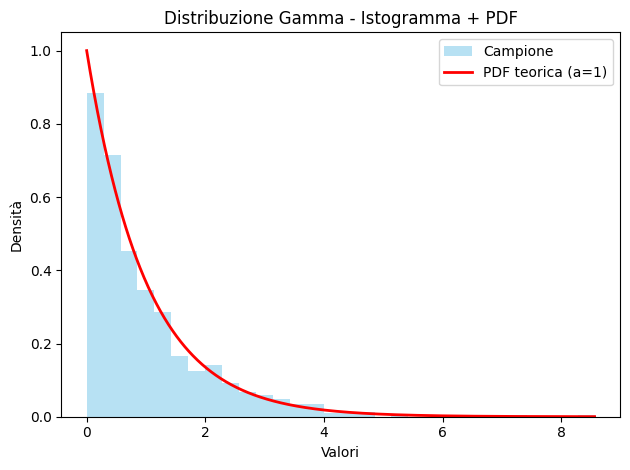

In [28]:
# Traccio l'istogramma dei dati osservati
plt.hist(
    sample,             # Campione generato 
    bins=30,            # Numero di suddivisioni dell'intervallo
    density=True,       # Normalizza l'area sotto l'istogramma a 1 (per confrontarla con la PDF)
    alpha=0.6,          # Trasparenza delle barre
    color="skyblue",    # Colore istogramma
    label="Campione")   # Etichetta

# Creo un array di valori su cui valutare la PDF
x = np.linspace(0, sample.max(), 1000)

# Calcolo la PDF teorica della distribuzione gamma con parametro a=1
pdf = gamma.pdf(x, a=1)

# Traccio la PDF teorica
plt.plot(
    x, pdf,                     # Asse x e y 
    "r-",                       # Linea rossa continua
    lw=2,                       # Spessore linea
    label="PDF teorica (a=1)")  # Etichetta

# Aggiungo il titolo e le etichette per gli assi
plt.title("Distribuzione Gamma - Istogramma + PDF")
plt.xlabel("Valori")
plt.ylabel("Densità")

# Legenda
plt.legend()

#  Sistema layout per non far sovrapporre elementi
plt.tight_layout()

# Mostra il grafico
plt.show()

## INFO: Questo grafico mostra:
#       - Le FREQUENZE OSSERVATE nel campione (hist);
#       - La CURVA TEORICA DELLA PDF gamma con shape=1 (gamma.pdf)

# Questo mi permette di visualizzare il COMPORTAMENTO EMPIRICO VS TEORICO della distribuzione gamma

***Punto 3: Stima dei parametri con fit***

In [29]:
# Stimo i parametri della distribuzione gamma dal campione.    Restituisce: (loc, scale, shape)
loc, scale, shape = gamma.fit(sample)

# Stampo i risultati
print(f"Parametro loc: {loc:.4f}")
print(f"Parametro scale: {scale:.4f}")
print(f"Parametro di forma (a): {shape:.4f}")

## INFO: 
#   - fit(): Usa la MASSIMA VEROSIMIMIGLIANZA per stimare i parameti
#   - gamma.fit(): Restituisce 3 VALORI: loc, scale e shape (dove a = shape)

#                  -> LOC(Parametro di traslazione): Sposta la distribuzione lungo l'asse x.    
#                           Es: Se loc=0, la distribuzione inizia da 0

#                  -> SCALE (Fattore di scala): Allarga o restringe la distribuzione            
#                           Es: Piu' scale è grande, più la curva è "larga"

#                  -> SHAPE/a (Parametro di forma): Definisce la distribuzione gamma
#                           Es: a = 1: Distribuzione Esponenziale     
#                           Es: a > 1: Curva più simmetrica

Parametro loc: 0.9745
Parametro scale: 0.0005
Parametro di forma (a): 1.0274


***Punto 4: Traccia la CDF (funzione di ripartizione cumulativa) della distribuzione Gamma***

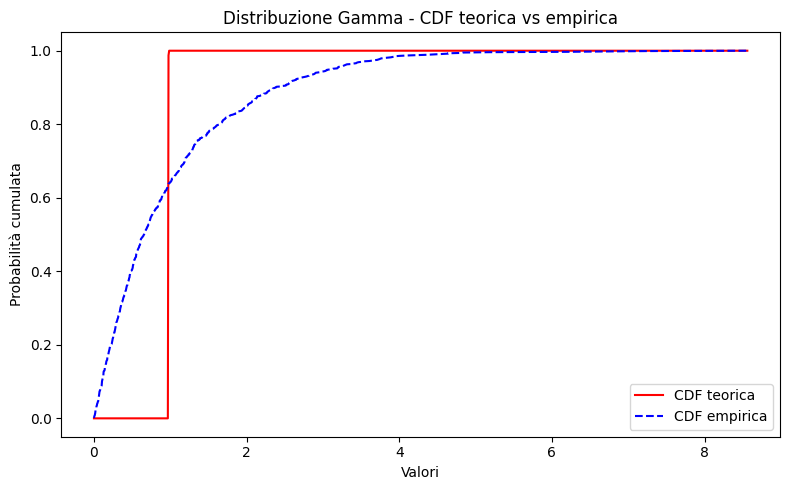

In [30]:
# Creo un array di x su cui valutare la CDF
x = np.linspace(0, sample.max(), 1000)

# Calcolo la CDF teorica con i parametri stimati
cdf_teorica = gamma.cdf (x, a=shape, loc=loc, scale=scale)

# Calcolo la CDF empirica del campione (con istogramma cumulativo)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)         # CDF empirica del campione

# Creo la figura per il confronto
plt.figure(figsize=(8, 5))  

# Traccio la PDF teorica
plt.plot(
    x, 
    cdf_teorica, 
    label="CDF teorica", 
    color="red")

# Traccio la CDF empirica ottenuta dai dati
plt.plot(
    ecdf.x, 
    ecdf.y, 
    label="CDF empirica", 
    linestyle="--", 
    color="blue")

# # Aggiungo il titolo e le etichette per gli assi
plt.title("Distribuzione Gamma - CDF teorica vs empirica")
plt.xlabel("Valori")
plt.ylabel("Probabilità cumulata")

# Legenda
plt.legend()

# Miglioro il layout
plt.tight_layout()

# Mostra il grafico
plt.show()

## INFO: Questo grafico confronta:
#       - La CURVA CUMULATRA TEORICA, basata sui parametri stimati
#       - La DISTRIBUZIONE CUMULATIVA REALE osservata dal campione

# Il confronto mostra quanto bene la distribuzione stimata si adatta ai dati reali.

***Punto 5: Calcolo della varianza***

In [31]:
# Calcolo la varianza del campione
varianza = np.var(sample)
print(f"Varianza del campione: {varianza:.4f}")

# Calcolo la varianza teorica stimata dal fit
var_teorica = gamma.var(a=shape, loc=loc, scale=scale)
print(f"Varianza teorica stimata: {var_teorica:.4f}")

## INFO: Calcolare la varianza, significa calcolare 
#        quanto i dati sono "sparsi" intorno alla media

Varianza del campione: 1.0590
Varianza teorica stimata: 0.0000


### **2. Fitta i dati**
1. Prova a fittare i dati sottostante con le migliori curve.
2. Calcola il MAE e l'RMSE

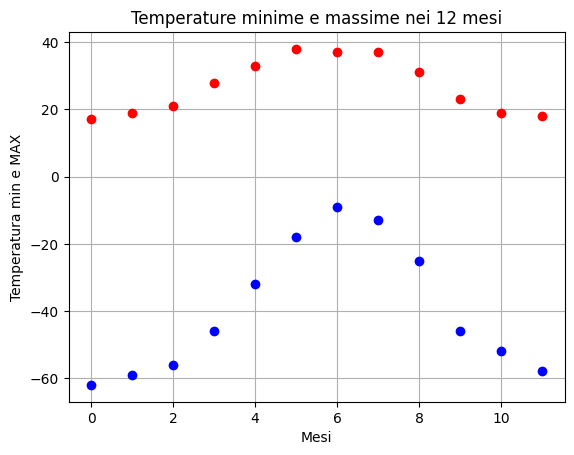

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Temperature massime e minime per ciascun mese
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Mesi dell'anno
mesi = np.arange(12)

# Visualizzazione punti
plt.plot(mesi, temp_max, "ro")      # Punti rossi per MAX
plt.plot(mesi, temp_min, "bo")      # Punti blu per min
plt.xlabel("Mesi")
plt.ylabel("Temperatura min e MAX")
plt.title("Temperature minime e massime nei 12 mesi")
plt.grid(True)
plt.show()


***Punto 1a: Fitta i dati: Fit di temp_max con funzione coseno***

Parametri stimati: a=1.50, b=-1.85, c=16.17, d=26.90


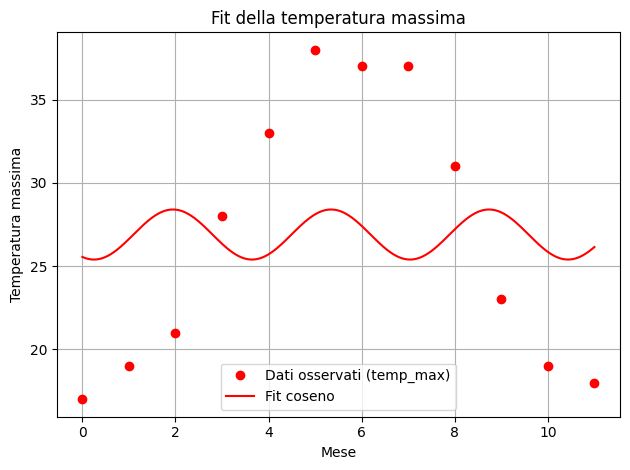

In [33]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Funzione da fittare (coseno generalizzato)
def modello_coseno (x, a, b, c, d):
    return a * np.cos(b * x + c) + d

# Dati da fittare
x = mesi
y = temp_max

# Fit dei dati con curve_fit
parametri, _ = curve_fit(modello_coseno, x, y)

# Parametri stimati: a, b, c, d
a, b, c, d = parametri
print(f"Parametri stimati: a={a:.2f}, b={b:.2f}, c={c:.2f}, d={d:.2f}")

# Calcolo la curva fittata
x_fit = np.linspace(0, 11, 1000)
y_fit = modello_coseno(x_fit, a, b, c, d)

# Plot dei punti originali + curva fittata
plt.plot(x, y, "ro", label="Dati osservati (temp_max)")
plt.plot(x_fit, y_fit, "r-", label="Fit coseno")
plt.xlabel("Mese")
plt.ylabel("Temperatura massima")
plt.title("Fit della temperatura massima")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## INFO: Con questo ho:
#       - Il grafico con punti + curva fittata
#       - I PARAMETRI STIMATI
#       - Una base per calcolare gli errori MAE/RMSE

***Punto 1b: Fitta i dati: Fit di temp_min con funzione coseno***

Parametri stimati (temp_min): a=-3.57, b=-4.45, c=24.54, d=-39.29


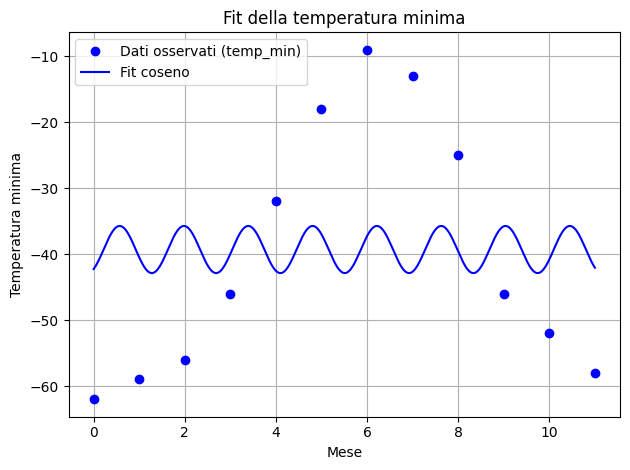

In [34]:
# Funzione da fittare (coseno generalizzato)
def modello_coseno (x, a, b, c, d):
    return a * np.cos(b * x + c) + d

# Dati da fittare
x = mesi
y = temp_min

# Fit dei dati con curve_fit
parametri_min, _ = curve_fit(modello_coseno, x, y)

# Parametri stimati: a, b, c, d
a_min, b_min, c_min, d_min = parametri_min
print(f"Parametri stimati (temp_min): a={a_min:.2f}, b={b_min:.2f}, c={c_min:.2f}, d={d_min:.2f}")

# Calcolo la curva fittata
x_fit = np.linspace(0, 11, 1000)
y_fit_min = modello_coseno(x_fit, a_min, b_min, c_min, d_min)

# Plot dei punti originali + curva fittata
plt.plot(x, y, "bo", label="Dati osservati (temp_min)")
plt.plot(x_fit, y_fit_min, "b-", label="Fit coseno")
plt.xlabel("Mese")
plt.ylabel("Temperatura minima")
plt.title("Fit della temperatura minima")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## INFO: Ora ho fittato i dati della temperatura minima!

***Punto 3: Calcolo di MAE e RMSE per entrambi***

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

## === TEMP_MAX ===

#  Valori fittati sui mesi interi (0–11)
fit_max = modello_coseno(mesi, a, b, c, d)

# Calcolo MAE e RMSE per temp_max 
mae_max = mean_absolute_error(temp_max, fit_max)
rmse_max = np.sqrt(mean_squared_error(temp_max, fit_max))

# Stampo temp_max
print(f"Calcolo di MAE e RMSE per temp_max:")
print(f"MAE (max): {mae_max:.2f}")
print(f"RMSE (max): {rmse_max:.2f}\n")

## === TEMP_min ===

#  Valori fittati sui mesi interi (0–11)
fit_min = modello_coseno(mesi, a_min, b_min, c_min, d_min)

# Calcolo MAE e RMSE per temp_min e stampo
mae_min = mean_absolute_error(temp_min, fit_min)
rmse_min = np.sqrt(mean_squared_error(temp_min, fit_min))

# Stampo temp_min
print(f"Calcolo di MAE e RMSE per temp_min:")
print(f"MAE (min): {mae_min:.2f}")
print(f"RMSE (min): {rmse_min:.2f}")

## INFO: 
#   - MAE (Mean Absolute Error): Media degli errori assoluti tra i valori osservati e quelli stimati.
#                                Valori più bassi indicano miglio aderenza ai dati.

#  - RMSE (Root Mean Squared Error): Radice quadratica media rispetto al quadrato.
#                                    Penalizza gli errori grandi, valori più bassi sono migliori.

Calcolo di MAE e RMSE per temp_max:
MAE (max): 7.30
RMSE (max): 7.75

Calcolo di MAE e RMSE per temp_min:
MAE (min): 17.00
RMSE (min): 18.32


### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

***Punto 1: Importo il dataset e visualizzo i dati***

In [ ]:
import pandas as pd

# Carico il dataset da URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Mostro le prime 5 righe per capire la struttura del dataset
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


***Punto 2: Costruzione del modello lineare***

In [36]:
from sklearn.linear_model import LinearRegression

# Seleziono la variabile indipendente (peso) e dipendente (mpg)
peso = df[['wt']]     
consumo = df['mpg']     

# Creo e alleno il modello
model = LinearRegression()
model.fit(peso, consumo)    

LinearRegression()

***Punto 3: Coefficiente, intercetta e R²***

In [ ]:
# Coefficiente angolare 
slope = model.coef_[0]

# Intercetta
intercept = model.intercept_

# R²
r2 = model.score(peso, consumo)

# Stampo i risultati
print(f"Coefficiente angolare (slope): {slope:.4f}")
print(f"Intercetta: {intercept:.4f}")
print(f"R² (coefficiente di determinazione): {r2:.4f}")

## INFO:
#   - SLOPE (Coefficente angolare): Indica la variazione di 'mpg' (var. dipendente) per ogni unità in più di 'peso' (var indipendente)
#   - INTERCEPT (Intercetta): Indica il valore di 'mpg' quando il peso è zero. Punto di partenza della retta.
#   - R² (Coefficente di determinazione): Indica quanto bene il modello spiega i dati. Va da 0 = 'nessuna spiegazione' a 1 = 'perfetto'.

Coefficiente angolare (slope): -5.3445
Intercetta: 37.2851
R² (coefficiente di determinazione): 0.7528


***Punto 4: Grafico con retta di regressione***

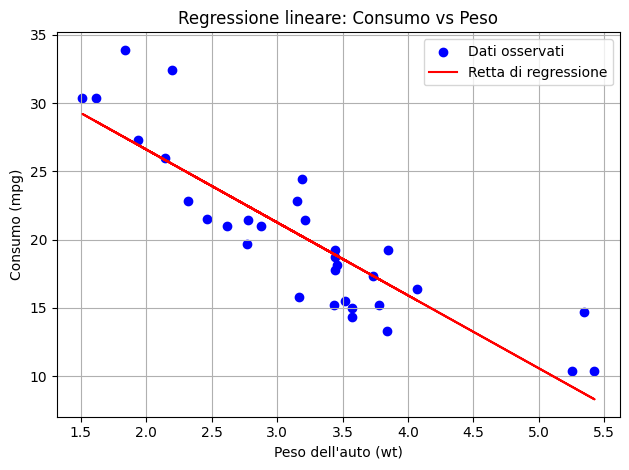

In [39]:
import matplotlib.pyplot as plt

# Predizioni del modello sui valori reali di peso
consumo_predetto = model.predict(peso)

# Traccio il plot dei dati osservati (punti)
plt.scatter(
    peso, 
    consumo, 
    color='blue', 
    label='Dati osservati')

# Traccio la retta di regressione
plt.plot(
    peso, 
    consumo_predetto, 
    color='red', 
    label='Retta di regressione')

# Aggiungo il titolo e le etichette per agli assi
plt.xlabel("Peso dell'auto (wt)")
plt.ylabel("Consumo (mpg)")
plt.title("Regressione lineare: Consumo vs Peso")

# Aggiungo la legenda
plt.legend()

# Aggiungo la griglia per migliorare la leggibilità
plt.grid(True)

# Ottimizzo il layout
plt.tight_layout()

# Mostro il grafico
plt.show()